# Assignment 3: Frequency Domain
Tổng quan: Ở bài tập này, chúng ta sẽ thực hành lập trình một số hàm xử lí ảnh cơ bản trong miền tần số
- Chuyển đổi giữa miền không gian và miền tần số
- Lọc trong miền tần số

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math

## Sự khác biệt giữa miền không gian và miền tần số
Trong miền không gian, ta xử lý trực tiếp trên từng điểm ảnh, còn trong miền tần số, ta xử lý dựa trên tốc độ thay đổi giá trị ảnh trong miền không gian.
- Miền không gian: Ma trận ảnh đầu vào -> Xử lý -> Ma trận ảnh đầu ra
- Miền tần số: Ảnh vào -> Phân bố tần số -> Xử lý -> Chuyển đổi ngược -> Ảnh ra

Trong nhiều trường hợp, người ta dùng chuyển đổi Fourier để chuyển ảnh từ miền không gian sang miền tần số.

Một số hàm chuyển đổi và xử lý trong miền tần số:
- cv2.dft(): https://docs.opencv.org/4.5.2/d2/de8/group__core__array.html#gadd6cf9baf2b8b704a11b5f04aaf4f39d
- np.fft.fft2(): https://numpy.org/doc/stable/reference/generated/numpy.fft.fft2.html
- np.fft.fftshift(): https://numpy.org/doc/stable/reference/generated/numpy.fft.fftshift.html
- cv2.cartToPolar(): https://docs.opencv.org/4.5.2/d2/de8/group__core__array.html#gac5f92f48ec32cacf5275969c33ee837d
- cv2.polarToCart(): https://docs.opencv.org/4.5.2/d2/de8/group__core__array.html#ga581ff9d44201de2dd1b40a50db93d665


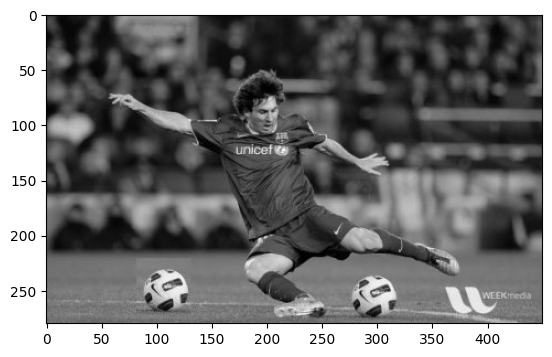

In [2]:
# read input as grayscale
img = cv2.imread('images/messi.jpg', 0)
plt.imshow(img, cmap='gray')
plt.show()

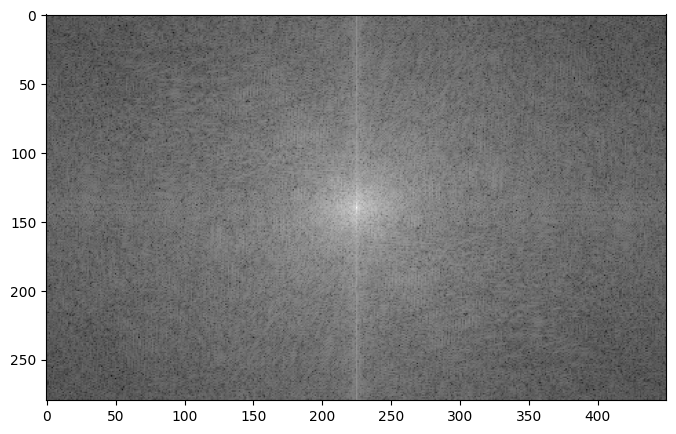

In [5]:
# convert image to floats and do dft saving as complex output
# input need float, output change to số phức
dft = cv2.dft(np.float32(img), flags = cv2.DFT_COMPLEX_OUTPUT)
# size dạng (w,h, 0/1) tượng trưng cho thực/ảo

# apply shift of origin from upper left corner to center of image 
# (0,0) -> (center,center) ; (W/2,H/2) -> (W, H)
dft_shift = np.fft.fftshift(dft)

'''
Vì chứa số phức nên để hiển thị thì cần chuyển thành phổ biên độ
là cv2.magnitude().
Nên log để nến phần trung tâm quá sáng lại trong khi phần rìa tối ít ảnh hưởng
Nhana 20 để đưa  về đơn vị decibel phù hợp cách đo tín hiệu thực tế (âm thanh, hình ảnh)
nên +1 trong log để tránh th vô cùng
'''
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

fig = plt.figure(figsize=(8,8))
plt.imshow(magnitude_spectrum, cmap='gray')
plt.show()

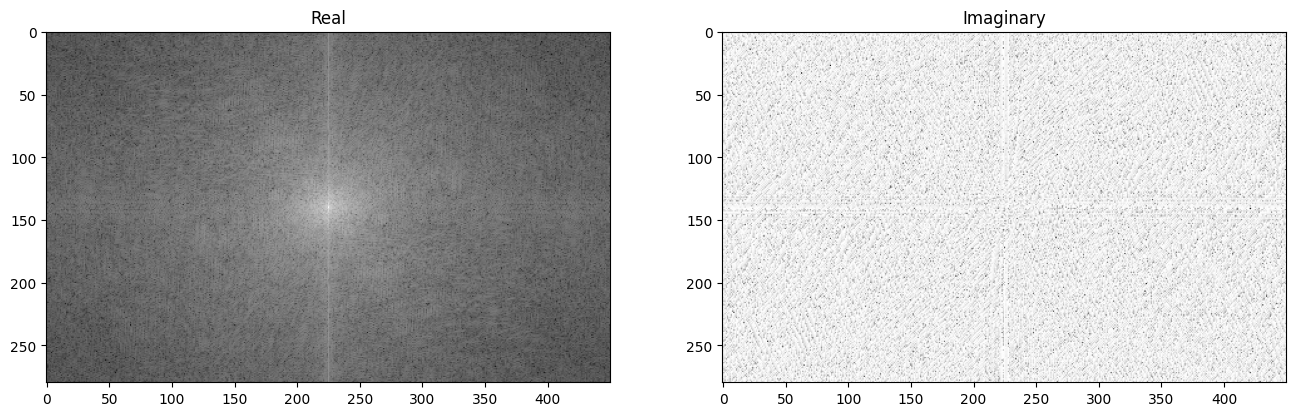

In [6]:
# display real and imaginary components
real, imag = cv2.cartToPolar(dft_shift[:,:,0],dft_shift[:,:,1])
# decartes sang hệ polar

real = np.log(real) / 30 # lại là nén 1 cách hợpp lý dải quá rộng: r
imag = np.log(imag) / 30 # biểu thị pha : phi

fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(121)
ax1.title.set_text('Real')
plt.imshow(real, cmap='gray')
ax2 = fig.add_subplot(122)
ax2.title.set_text('Imaginary')
plt.imshow(imag, cmap='gray')
plt.show()

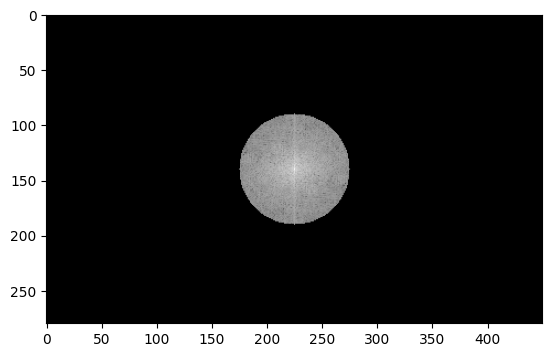

In [9]:
# low pass filter example : giữ tần số thấp, loại bỏ các tần số cao
# thấp: đại diện màu sắc mượt, chi tiết lớn (nền, bóng mờ)
# cao: chi tiét sác nét, cạnh, nhiễu
# -> làm mờ ảnh vì giữ các vùng min, loại bỏ chi tiết nhỏ(tần số cao)
center = np.array(img.shape)/2
rad = 50
cnt = 0
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if np.linalg.norm(np.array((i,j)) - center) > rad:
            # hàm để tính chuẩn Euclid: căn tổng bình
            magnitude_spectrum[i,j] = 0
plt.imshow(magnitude_spectrum, cmap='gray')
plt.show()

(280, 450) (280, 450, 2)


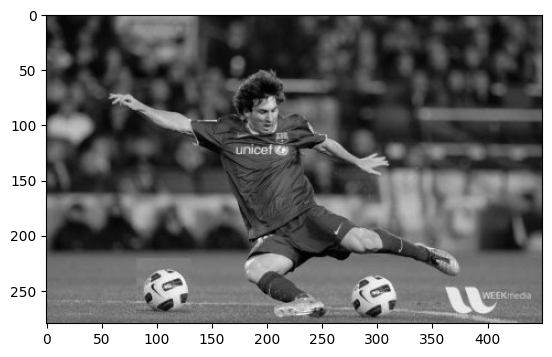

In [15]:
# shift origin from center to upper left corner
back_ishift = np.fft.ifftshift(dft_shift)

# do idft saving as complex output,
# cv2.idft() trả về một ma trận số phức 
# (giống như cv2.dft()), tức là img_back = Real + j*Imag
img_back = cv2.idft(back_ishift)
print(img.shape, img_back.shape)

# combine complex components into original image again
# Khi chuyển ảnh về miền không gian (spatial domain),
# ta cần tính lại biên độ ảnh gốc từ số phức.
img_back = cv2.magnitude(img_back[:,:,0], img_back[:,:,1])


# re-normalize to 8-bits
img_back = cv2.normalize(img_back, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

plt.imshow(img_back, cmap='gray')
plt.show()

# 2 magnitude khác mục đích sử dụng dù cùng chuyển số phức thành biến độ phổ tần số
# DFT thì để hiển thị phổ tần số còn IDFT thì khôi phục , hiển thị ảnh gốc

## Loại bỏ nhiễu sin (thủ công)

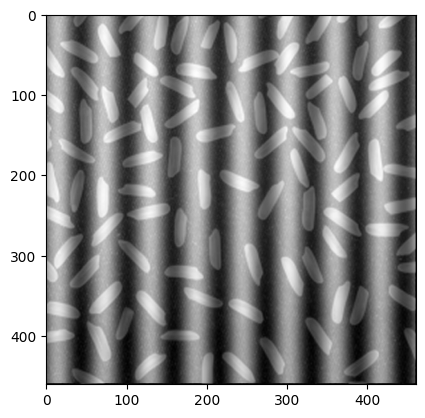

In [16]:
img = cv2.imread('images/gao.png',0)
plt.imshow(img, cmap = 'gray')
plt.show()

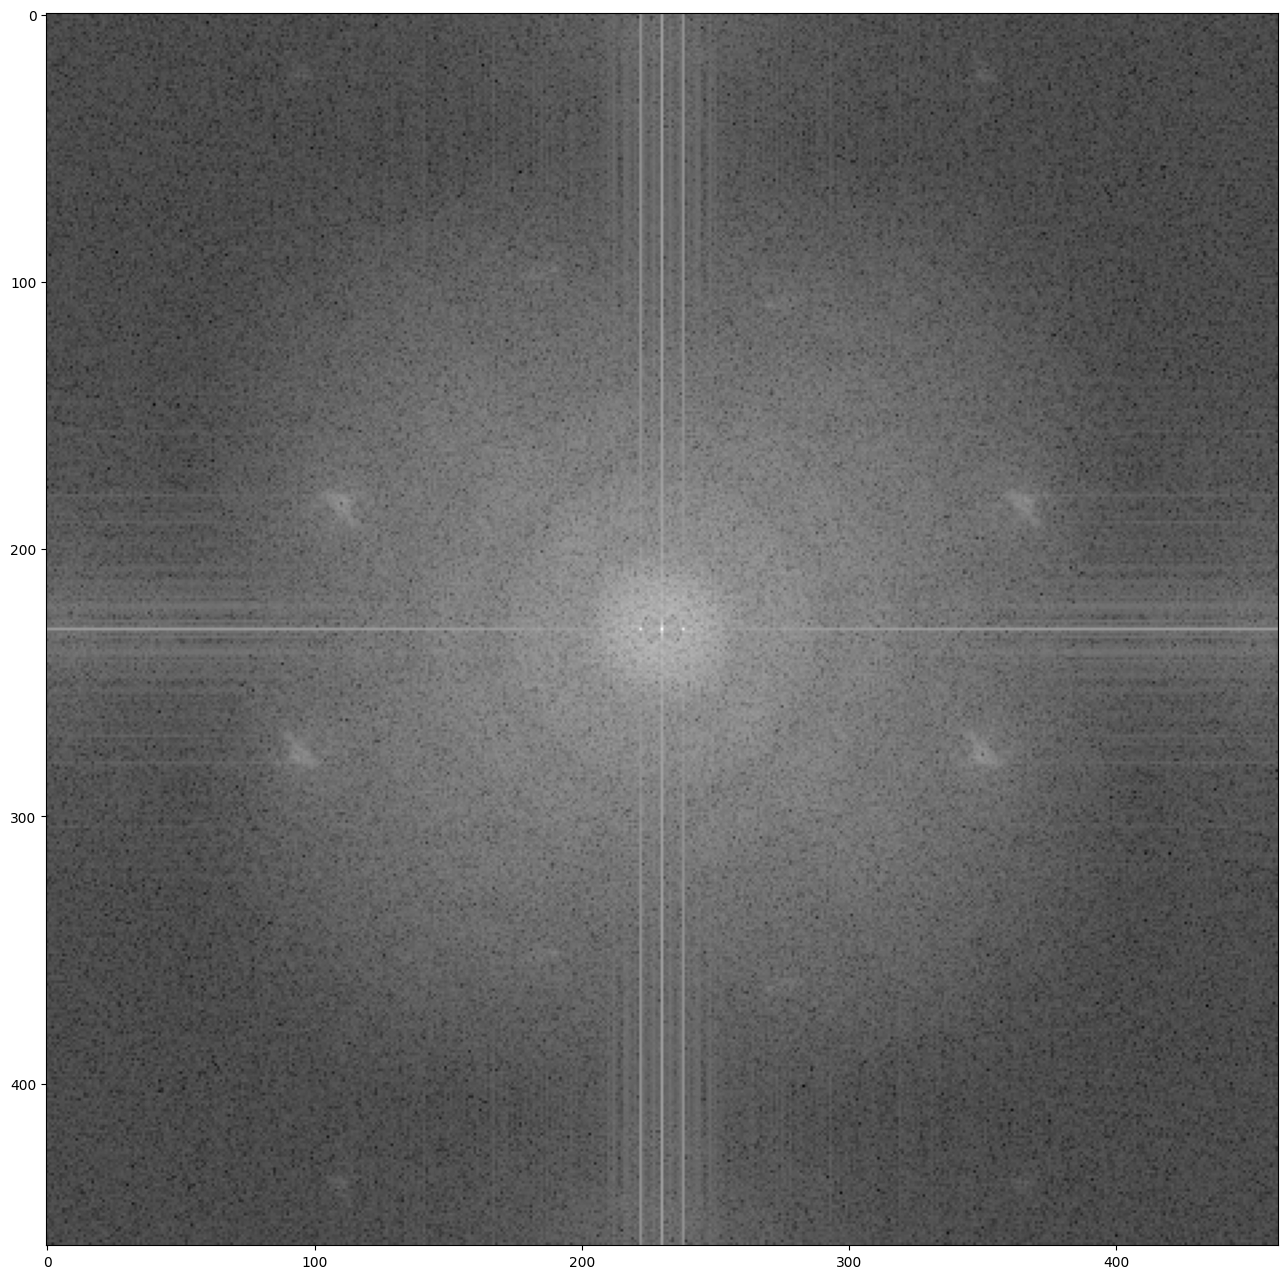

In [17]:
dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
plt.figure(figsize=(16,16))
plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.show()

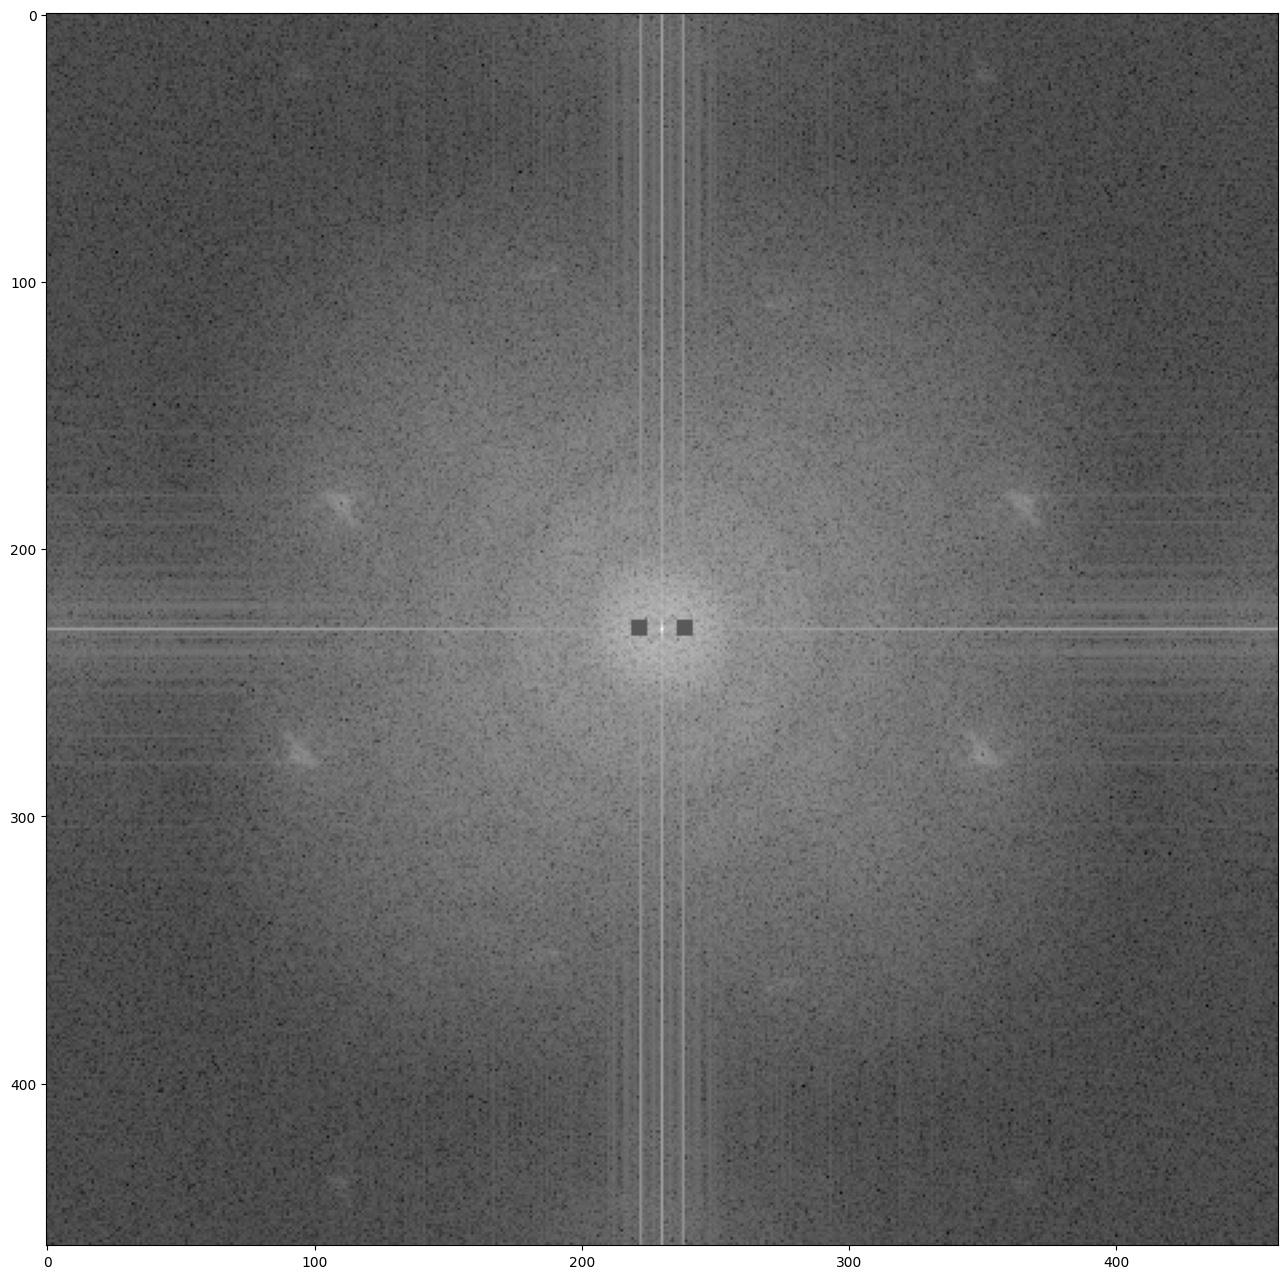

In [18]:
dft_shift[227:233, 236:242] = 255
dft_shift[227:233, 219:225] = 255
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
plt.figure(figsize=(16,16))
plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.show()

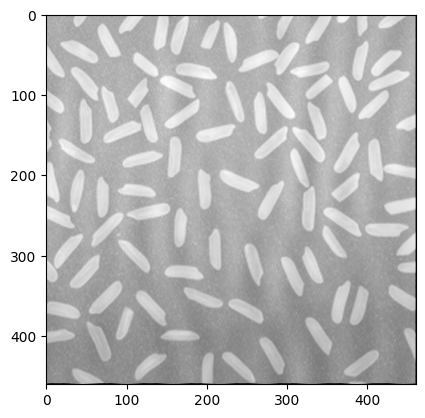

In [19]:
dft_ishift = np.fft.ifftshift(dft_shift)
idft = cv2.idft(dft_ishift)
img_back = cv2.magnitude(idft[:,:,0],idft[:,:,1])
plt.imshow(img_back, cmap = 'gray')
plt.show()

# Bài tập thực hành

## Các hàm được cung cấp

In [23]:
def get_ideal_low_pass_filter(shape, cutoff):
    """Computes a Ideal low pass mask
    takes as input:
    shape: the shape of the mask to be generated
    cutoff: the cutoff frequency of the ideal filter
    returns a ideal low pass mask"""

    d0 = cutoff
    rows, columns = shape
    mask = np.zeros((rows, columns), dtype=int)
    mid_R, mid_C = int(rows/2), int(columns/2)
    for i in range(rows):
        for j in range(columns):
            d = math.sqrt((i - mid_R)**2 + (j - mid_C)**2) # căn tổng bình
            if d <= d0:
                mask[i, j] = 1
            else:
                mask[i, j] = 0

    return mask

## Lọc thông thấp

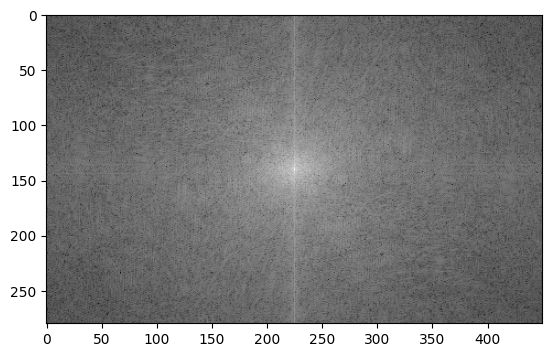

In [20]:
input_image = cv2.imread('images/messi.jpg', 0)

fft = np.fft.fft2(input_image)
shift_fft = np.fft.fftshift(fft)

# showing purpose only
mag_dft = np.log(np.abs(shift_fft))
plt.imshow(mag_dft, cmap='gray')
plt.show()

Yêu cầu:
- Lấy shape của ảnh đầu vào
- Lựa chọn cutoff
- Chuẩn bị bộ lọc mask (sử dụng hàm có sẵn ở trên)

(280, 450)


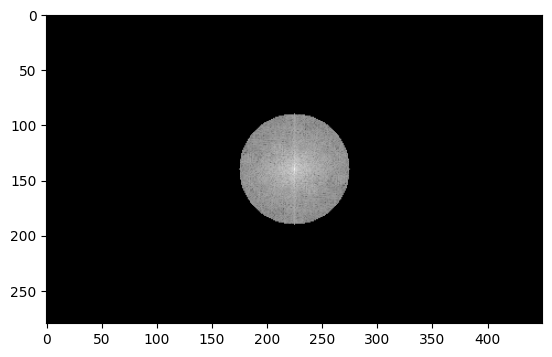

In [24]:
### YOUR CODE HERE ###

shape = input_image.shape
# print(shape)
cutoff = 50
mask = get_ideal_low_pass_filter(shape, cutoff)

### YOUR CODE HERE ###
filtered_image = np.multiply(mask, shift_fft)

# showing purpose only
mag_filtered_dft = np.log(np.abs(filtered_image)+1)
plt.imshow(mag_filtered_dft, cmap='gray')
plt.show()

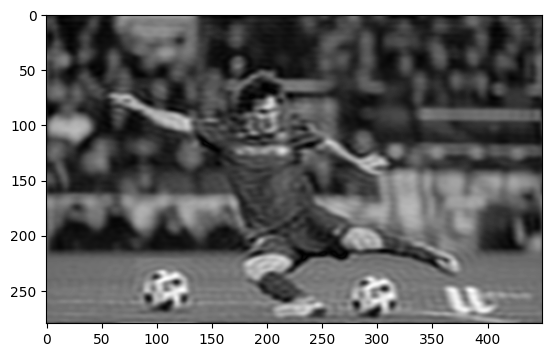

In [26]:
shift_ifft = np.fft.ifftshift(filtered_image)
ifft = np.fft.ifft2(shift_ifft)
mag = np.abs(ifft)
plt.imshow(mag, cmap='gray')
plt.show()

# Lọc thông cao

Yêu cầu: Hoàn thành hàm xây dựng bộ lọc thông cao và áp dụng vào ảnh

In [29]:
def get_ideal_high_pass_filter(shape, cutoff):
    """Computes a Ideal high pass mask
    takes as input:
    shape: the shape of the mask to be generated
    cutoff: the cutoff frequency of the ideal filter
    returns a ideal high pass mask"""

    ### YOUR CODE HERE ###
    
    d0 = cutoff
    rows, columns = shape
    mask = np.zeros((rows, columns), dtype=int)
    mid_R, mid_C = int(rows/2), int(columns/2)
    for i in range(rows):
        for j in range(columns):
            d = math.sqrt((i - mid_R)**2 + (j - mid_C)**2) # căn tổng bình
            if d <= d0:
                mask[i, j] = 0
            else:
                mask[i, j] = 1
    
    ### YOUR CODE HERE ###

    return mask

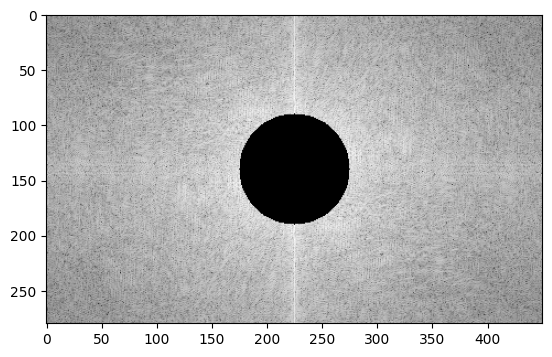

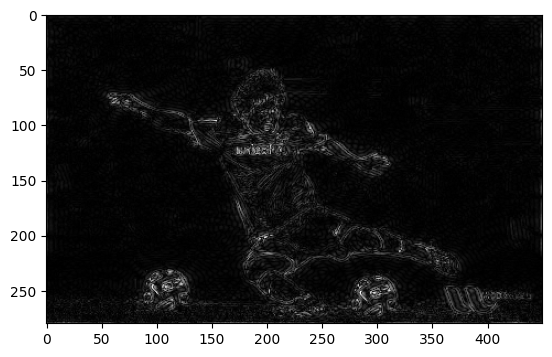

In [31]:
### YOUR CODE HERE ###
mask = get_ideal_high_pass_filter(shape, cutoff)

filtered_image = np.multiply(mask, shift_fft)

mag_filtered_dft = np.log(np.abs(filtered_image)+1)
plt.imshow(mag_filtered_dft, cmap='gray')
plt.show()
shift_ifft = np.fft.ifftshift(filtered_image)
ifft = np.fft.ifft2(shift_ifft)
mag = np.abs(ifft)
plt.imshow(mag, cmap='gray')
plt.show()

# Lọc theo đoạn

Yêu cầu: Hoàn thành hàm xây dựng bộ lọc theo đoạn và áp dụng vào ảnh

In [32]:
def get_ideal_band_pass_filter(shape, cutoff1, cutoff2):
    """Computes a Ideal band pass mask
    takes as input:
    shape: the shape of the mask to be generated
    cutoff1, cutoff2: the cutoff frequency of the ideal filter
    returns a ideal band pass mask"""

    ### YOUR CODE HERE ###
    d1 = cutoff1
    d2 = cutoff2
    rows, columns = shape
    mask = np.zeros((rows, columns), dtype=int)
    mid_R, mid_C = int(rows/2), int(columns/2)
    for i in range(rows):
        for j in range(columns):
            d = math.sqrt((i - mid_R)**2 + (j - mid_C)**2) # căn tổng bình
            if d1 <= d <= d2:
                mask[i, j] = 1
            else:
                mask[i, j] = 0
    pass
    
    ### YOUR CODE HERE ###

    return mask

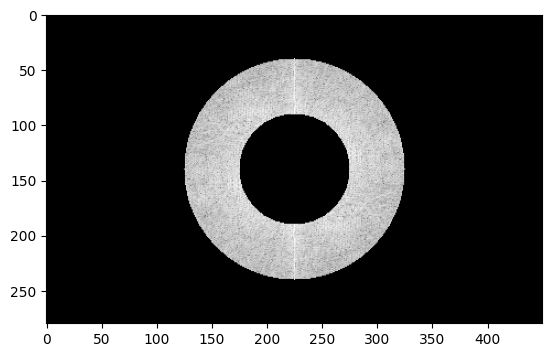

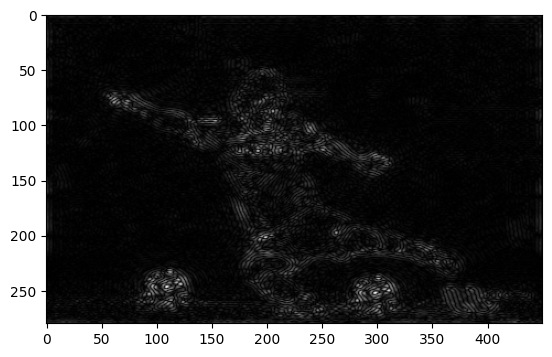

In [34]:
### YOUR CODE HERE ###
cutoff1 = 50 
cutoff2 = 100
mask = get_ideal_band_pass_filter(shape, cutoff1, cutoff2)

filtered_image = np.multiply(mask, shift_fft)

mag_filtered_dft = np.log(np.abs(filtered_image)+1)
plt.imshow(mag_filtered_dft, cmap='gray')
plt.show()
shift_ifft = np.fft.ifftshift(filtered_image)
ifft = np.fft.ifft2(shift_ifft)
mag = np.abs(ifft)
plt.imshow(mag, cmap='gray')
plt.show()

## Lọc thông thấp với bộ lọc Gauss
Tạo mặt nạ để lọc thông thấp trong miền tần số có dạng hàm Gauss

Yêu cầu: Hoàn thành hàm xây dựng bộ lọc thông thấp với bộ lọc Gauss và áp dụng vào ảnh

$$\Large mask[i, j] = e^{-\frac{d^2}{2\times{d0^2}}}$$

In [43]:
def get_gaussian_low_pass_filter(shape, cutoff):
    """Computes a gaussian low pass mask
    takes as input:
    shape: the shape of the mask to be generated
    cutoff: the cutoff frequency of the gaussian filter (sigma)
    returns a gaussian low pass mask"""
    
    ### YOUR CODE HERE ###
    
    d0 = cutoff
    rows, columns = shape
    mask = np.zeros((rows, columns), dtype=float)
    mid_R, mid_C = int(rows/2), int(columns/2)
    for i in range(rows):
        for j in range(columns):
            d = math.sqrt((i - mid_R)**2 + (j - mid_C)**2) # căn tổng bình
            mask[i,j] = np.exp(-d**2/(2*d0**2))
    
    ### YOUR CODE HERE ###

    return mask

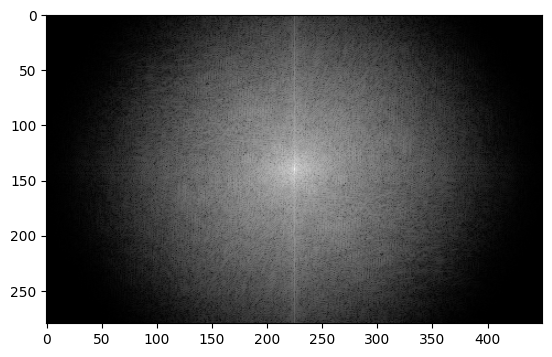

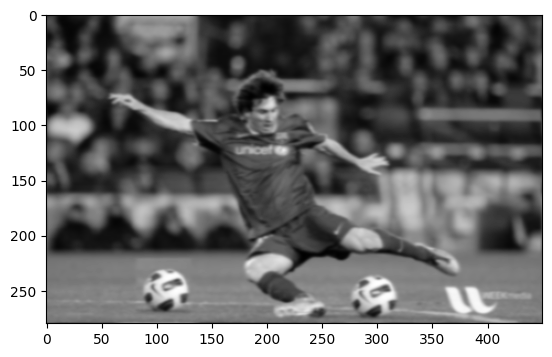

In [44]:
### YOUR CODE HERE ###
cutoff = 50
mask = get_gaussian_low_pass_filter(shape, cutoff)

filtered_image = np.multiply(mask, shift_fft)

mag_filtered_dft = np.log(np.abs(filtered_image)+1)
plt.imshow(mag_filtered_dft, cmap='gray')
plt.show()
shift_ifft = np.fft.ifftshift(filtered_image)
ifft = np.fft.ifft2(shift_ifft)
mag = np.abs(ifft)
plt.imshow(mag, cmap='gray')
plt.show()